In [163]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
z90 = 1.645
z95 = 1.96
z99 = 2.576
%matplotlib inline

0.04486555082549959


(array([   5.,   11.,   58.,  204.,  823., 2028., 2930., 2453., 1043.,
         332.,   86.,   20.,    7.]),
 array([-5.23723454, -4.44809065, -3.65894676, -2.86980286, -2.08065897,
        -1.29151508, -0.50237119,  0.2867727 ,  1.0759166 ,  1.86506049,
         2.65420438,  3.44334827,  4.23249217,  5.02163606]),
 <BarContainer object of 13 artists>)

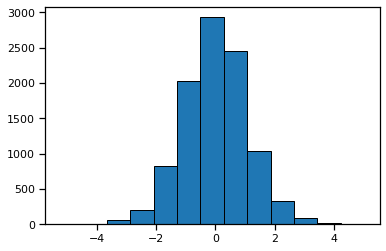

In [165]:
# calculate two tailed p-value
print((1 - t.cdf(x=2.14, df=20)) * 2)

#generate t distribution with sample size 10000
df = 12
x = t.rvs(df=df, size=10000)

#create plot of t distribution
plt.hist(x, edgecolor='black', bins=df+1)

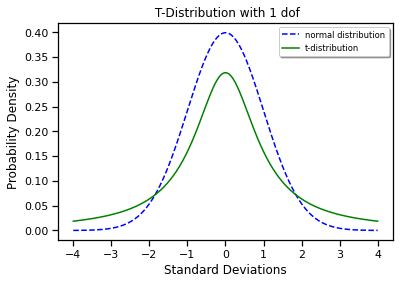

In [218]:
# figure 7.1
df = 1
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df)
z = stats.norm.pdf(x)

plt.ylabel('Probability Density')
plt.xlabel('Standard Deviations')
plt.title(f' T-Distribution with 1 dof')

plt.plot(x,z,'--',color='blue',label='normal distribution')
plt.plot(x, y, color='green',label='t-distribution')
legend = plt.legend(shadow=True,fontsize='small')

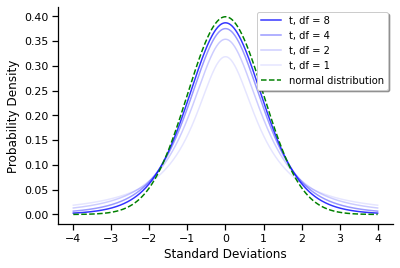

In [64]:
# figure 7.2
plt.ylabel('Probability Density')
plt.xlabel('Standard Deviations')
for i in [8,4,2,1]:
    df = i
    x = np.linspace(-4, 4, 500)
    y = stats.t.pdf(x, df)
    z = stats.norm.pdf(x)
    plt.plot(x, y,color= 'b',alpha=i/10,label=f't, df = {df}'.format(df=i))

plt.plot(x,z,'--',color='green',label='normal distribution')


legend = plt.legend(shadow=True,fontsize='small')
sns.set_context('notebook')
sns.despine()

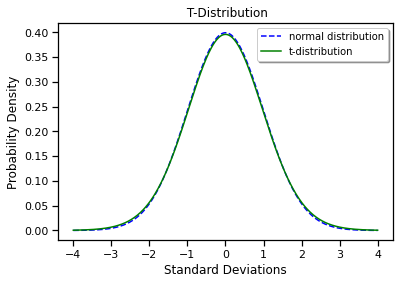

In [69]:
# as seen, the t-distribution converges to normal distribution as dof increases.
df = 30
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df)
z = stats.norm.pdf(x)

plt.ylabel('Probability Density')
plt.xlabel('Standard Deviations')
plt.title(f' T-Distribution')

plt.plot(x,z,'--',color='blue',label='normal distribution')
plt.plot(x, y, color='green',label='t-distribution')
legend = plt.legend(shadow=True,fontsize='small')

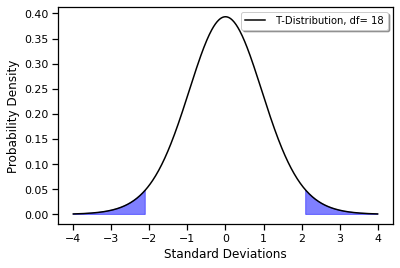

In [93]:
df = 18
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df)
t = -2.10

plt.ylabel('Probability Density')
plt.xlabel('Standard Deviations')

plt.plot(x, y, color='black',label=f' T-Distribution, df= {df}'.format(df=df))
legend = plt.legend(shadow=True,fontsize='small')
plt.fill_between(x, y, color='blue', alpha=0.5, where=(x<t) | (x>abs(t)))

Text(0.5, 1.0, 'Figure 7.4 - Right | Example 7.4')

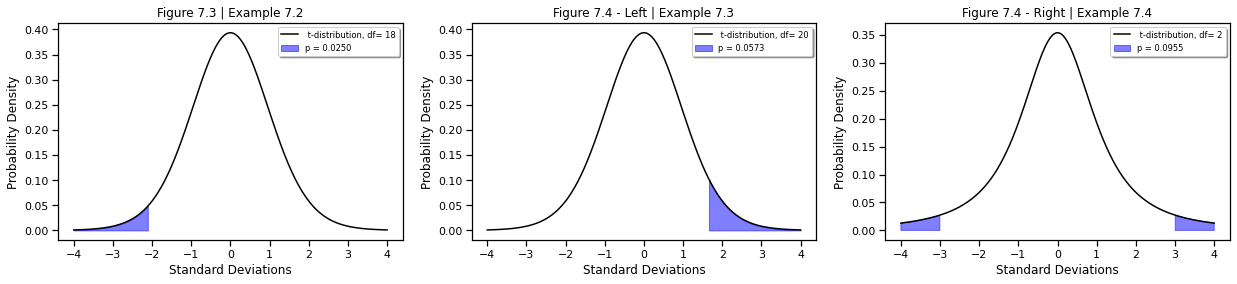

In [206]:
# figure 7.3 and 7.4 , example 7.2, 7.3, 7.4
fig = plt.figure(figsize=(21,4))
x = np.linspace(-4, 4, 500)

# AX1 -----
ax1 = fig.add_subplot(1,3,1)
df1 = 18
t1 = -2.10
y1 = stats.t.pdf(x, df1)
p1 = t.cdf(x=t1, df=df1)

ax1.plot(x, y, color='black',label=f' t-distribution, df= {df1}'.format(df=df1))
ax1.fill_between(x, y1, color='blue', alpha=0.5, where=(x<t1),label="p = {:.4f}".format(p1))
legend = ax1.legend(shadow=True,fontsize='small')
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Standard Deviations')
ax1.set_title('Figure 7.3 | Example 7.2')


# AX2 -----
ax2 = fig.add_subplot(1,3,2)
df2 = 20
t2 = 1.65
y2 = stats.t.pdf(x, df2)
p2 = 1- t.cdf(x=t2, df=df2)

ax2.plot(x, y, color='black',label=f' t-distribution, df= {df2}'.format(df=df2))
ax2.fill_between(x, y2, color='blue', alpha=0.5, where=(x>t2),label="p = {:.4f}".format(p2))
legend = ax2.legend(shadow=True,fontsize='small')
ax2.set_ylabel('Probability Density')
ax2.set_xlabel('Standard Deviations')
ax2.set_title('Figure 7.4 - Left | Example 7.3')

# AX3 -----
ax3 = fig.add_subplot(1,3,3)
df3 = 2
t3 = -3
y3 = stats.t.pdf(x, df3)
p3 = t.cdf(x=t3, df=df3) * 2

ax3.plot(x, y3, color='black',label=f' t-distribution, df= {df3}'.format(df=df3))
ax3.fill_between(x, y3, color='blue', alpha=0.5, where=(x<t3) | (x>abs(t3)),label="p = {:.4f}".format(p3))
legend = ax3.legend(shadow=True,fontsize='small')
ax3.set_ylabel('Probability Density')
ax3.set_xlabel('Standard Deviations')
ax3.set_title('Figure 7.4 - Right | Example 7.4')

Text(0.5, 1.0, 'Guided Practice 7.5')

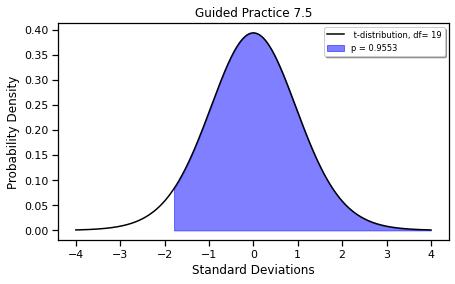

In [217]:
# guided practice 7.5: What proportion of the t-distribution with 19 degrees of freedom falls above -1.79 units? Use your preferred method for finding tail areas.
fig = plt.figure(figsize=(7,4))
x = np.linspace(-4, 4, 500)

# AX1 -----
ax1 = fig.add_subplot(1,1,1)
df1 = 19
t1 = -1.79
y1 = stats.t.pdf(x, df1)
p1 = 1 - t.cdf(x=t1, df=df1)

ax1.plot(x, y, color='black',label=f' t-distribution, df= {df1}'.format(df=df1))
ax1.fill_between(x, y1, color='blue', alpha=0.5, where=(x>t1),label="p = {:.4f}".format(p1))
legend = ax1.legend(shadow=True,fontsize='small')
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Standard Deviations')
ax1.set_title('Guided Practice 7.5')

In [300]:
'''example 7.8: When n = 19, what is the appropriate degrees of freedom? Find t statistic for this degrees of freedom and the confidence level of 95%
'''
n = 19
xbar = 4.4
s = 2.3
mini = 1.7
maxi = 9.2
df = n - 1
ci = 95
c1t = (100 - ci) / 2 / 100
t_stat = stats.t.ppf(1-c1t, df) # upper tail is 1 - confidence level /2 (one tail)
print('''n = {n} , xbar = {xbar} , s = {s} , min = {mini}, max = {maxi}
the appropriate degrees of freedom is'''.format(n=n,s=s,xbar=xbar,mini=mini,maxi=maxi),df,'''
upper tail cutoff: t =''',t_stat)

'''example 7.9: Compute and interpret the 95% confidence interval for the average mercury content in Risso's dolphins.'''
se = s / np.sqrt(n)
me = t_stat * se
lo = xbar - me
hi = xbar + me
print('''standard error = {se}, me = {me}, , df = {df}
we're {ci}% confident that the true average mercury content in Risso's dolphins is between {lo} and {hi}'''.format(ci=ci,se=se,me=me,lo=lo,hi=hi,df=df))

n = 19 , xbar = 4.4 , s = 2.3 , min = 1.7, max = 9.2
the appropriate degrees of freedom is 18 
upper tail cutoff: t = 2.10092204024096
standard error = 0.527656187902292, me = 1.1085645148334506, , df = 18
we're 95% confident that the true average mercury content in Risso's dolphins is between 3.2914354851665495 and 5.508564514833451


In [351]:
'''guided practice 7.10
The FDA's webpage provides some data on mercury content of fish. Based on a sample of 15 croaker
white fish (Pacific), a sample mean and standard deviation were computed as 0.287 and 0.069 ppm
(parts per million), respectively. The 15 observations ranged from 0.18 to 0.41 ppm. We will assume
these observations are independent. Based on the summary statistics of the data, do you have any
objections to the normality condition of the individual observations?
example 7.11
Estimate the standard error of xhat = 0.287 ppm using the data summaries in Guided Practice 7.10.
If we are to use the t-distribution to create a 90% confidence interval for the actual mean of the
mercury content, identify the degrees of freedom and t-statistic?
guided practice 7.12
Using the information and results of Guided Practice 7.10 and Example 7.11, compute a 90% con-
fidence interval for the average mercury content of croaker white fish (Pacific).
'''
# i want to play with the real data so, i'll try to navigate through the data to find the same aggregate
# values with the author in the book.

merc = pd.read_csv("data/mercury.csv")
merc.dropna(inplace=True)
merc["CONC. (ppm)"] = pd.to_numeric(merc["CONC. (ppm)"].str.replace(',','.'))
print(merc.info())

# we need to find out what's the full name of the croaker white pacific fishes
print(merc[merc["ANALYTE MEASURED*"] == "Mercury"]["SAMPLE DESCRIPTION"].value_counts().index)
croaker = merc[merc["SAMPLE DESCRIPTION"] == "CROAKER WHITE"]
x = croaker["CONC. (ppm)"]

n = croaker["SAMPLE DESCRIPTION"].count()
xbar = x.mean()
s = x.std()
mini = x.min()
maxi = x.max()
mini_away = abs(xbar - mini) / s
maxi_away = abs(xbar - maxi) / s
print("7.10: since at most, the observations are",max(mini_away,maxi_away), '''standard deviations away 
from the mean and it's within 2 standard deviations, there are no clear outliers''')

df = n - 1
ci = 90
c1t = (100 - ci) / 2 / 100
t_stat = stats.t.ppf(1-c1t, df) # upper tail is 1 - confidence level /2 (one tail)
se = s / np.sqrt(n)
me = t_stat * se
lo = xbar - me
hi = xbar + me
print('''7.11: standard error = {se:.4f}, me = {me:.4f}, df = {df}, t_stat = {t_stat:.4f}
7.12: we're {ci}% confident that the true average mercury content in Risso's dolphins is between {lo:.4f} and {hi:.4f}'''
.format(ci=ci,se=se,me=me,lo=lo,hi=hi,df=df,t_stat=t_stat))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4505 entries, 15 to 4641
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SAMPLE DESCRIPTION  4505 non-null   object 
 1   ANALYTE MEASURED*   4505 non-null   object 
 2   CONC. (ppm)         4505 non-null   float64
 3   YEAR                4505 non-null   object 
dtypes: float64(1), object(3)
memory usage: 176.0+ KB
None
Index(['TUNA CANNED (ALBACORE)', 'TUNA CANNED (LIGHT)',
       'TUNA FR/FZN YELLOWFIN', 'TUNA CANNED (LIGHT CHUNK)', 'SWORDFISH',
       'TUNA CANNED (ALBACORE SOLID WHITE )', 'BLUEFISH', 'SARDINE',
       'CROAKER ATLANTIC', 'COD', 'ORANGE ROUGHY', 'SEA BASS CHILEAN',
       'HALIBUT', 'SALMON', 'TUNA CANNED (LIGHT YELLOWFIN)', 'LOBSTER',
       'TUNA FR/FZN', 'TUNA CANNED (ALBACORE CHUNK WHITE)',
       'FLATFISH: FLOUNDER', 'HADDOCK', 'POLLOCK', 'CRAWFISH', 'SNAPPER RED',
       'CATFISH', 'SEA BASS STRIPED', 'HAKE', 'SCALLOP',
   